## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[50, 54, 76],
       [25, 33, 71],
       [23, 29, 65],
       [39, 61, 75],
       [69, 77, 96],
       [12, 21, 97]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([50, 54, 76]), array([25, 33, 71]))

The lowest card in the game is

In [5]:
np.min(cards)

12

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

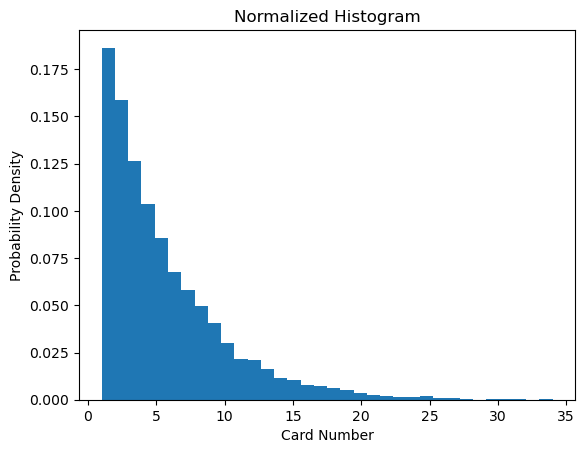

In [9]:
# We define a function that returns the lowest number in the card sample
def find_min(N, n, k):
    return np.min(sample_cards(N, n, k))

min_list = []

for i in range(10000):
    min_list.append(find_min(100, 6, 3))

hist, bins = np.histogram(min_list, bins=len(set(min_list)), density=True)
bin_width = bins[1] - bins[0]
normalized_hist = hist / (bin_width * np.sum(hist))

plt.bar(bins[:-1], normalized_hist, width=bin_width, align='edge')
plt.xlabel('Card Number')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram')
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

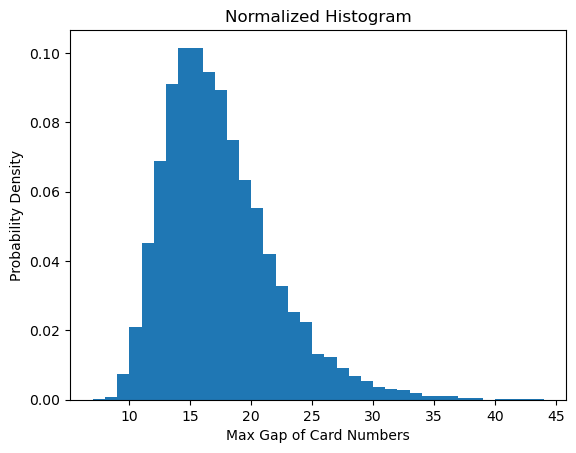

In [10]:
# We define a function that returns the largest gap in card numbers in the card sample
def max_gap(N, n, k):
    return np.max(np.diff(np.sort(np.concatenate(sample_cards(N, n, k)))))

max_gap_list = []

for i in range(10000):
    max_gap_list.append(max_gap(100, 6, 3))

hist, bins = np.histogram(max_gap_list, bins=len(set(max_gap_list)), density=True)
bin_width = bins[1] - bins[0]
normalized_hist = hist / (bin_width * np.sum(hist))

plt.bar(bins[:-1], normalized_hist, width=bin_width, align='edge')
plt.xlabel('Max Gap of Card Numbers')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram')
plt.show()

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

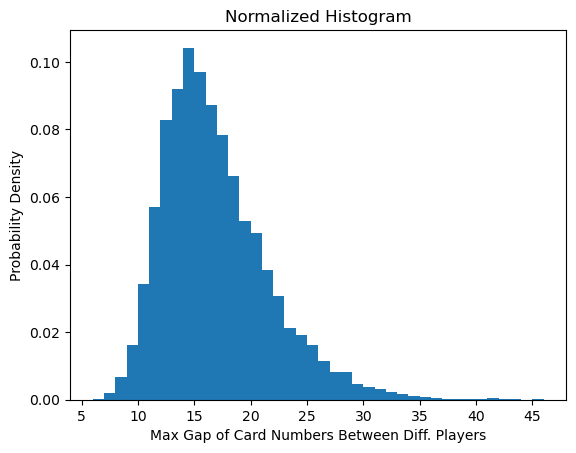

In [11]:
# We define a function that returns the largest gap in card numbers between cards of different players
def max_gap_diff_pl(N, n, k):
    numbers_with_indices = []

    cards = sample_cards(N, n, k)
    
    for i, nested in enumerate(cards):
        numbers_with_indices.extend([(num, i) for num in nested])

    sorted_numbers_with_indices = sorted(numbers_with_indices, key=lambda x: x[0])

    gaps = []

    for i in range(len(sorted_numbers_with_indices) - 1):
        if sorted_numbers_with_indices[i][1] != sorted_numbers_with_indices[i + 1][1]:
            gaps.append(sorted_numbers_with_indices[i + 1][0] - sorted_numbers_with_indices[i][0])

    largest_gap = max(gaps)
    
    return largest_gap

max_gap_diff_pl_list = []

for i in range(10000):
    max_gap_diff_pl_list.append(max_gap_diff_pl(100, 6, 3))
    
hist, bins = np.histogram(max_gap_diff_pl_list, bins=len(set(max_gap_diff_pl_list)), density=True)
bin_width = bins[1] - bins[0]
normalized_hist = hist / (bin_width * np.sum(hist))

plt.bar(bins[:-1], normalized_hist, width=bin_width, align='edge')
plt.xlabel('Max Gap of Card Numbers Between Diff. Players')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram')
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [55]:
# Based on the results below, the difference is larger when we have smaller n and k, but the output
# is more sensitive to the change in n, meaning the difference of the means decrease
# significantly faster when n increases

In [12]:
import pandas as pd

def mean_max_gap(N, n, k, t):
    max_gap_list = []

    for i in range(t):
        max_gap_list.append(max_gap(N, n, k))
    
    return np.average(max_gap_list)
    
def mean_max_gap_diff_pl(N, n, k, t):
    max_gap_diff_pl_list = []

    for i in range(t):
        max_gap_diff_pl_list.append(max_gap_diff_pl(N, n, k))
    
    return np.average(max_gap_diff_pl_list)

N = 100
t = 10000

n_values = np.arange(2, 11, 2)
k_values = np.arange(2, 11, 2)

df = pd.DataFrame(columns=k_values, index=n_values)

for n in n_values:
    for k in k_values:
        diff = mean_max_gap(N, n, k, t) - mean_max_gap_diff_pl(N, n, k, t)
        df.at[n, k] = diff

df.columns.name = 'Number of Cards per Player'
df.index.name = 'Number of Players'

print(df)

Number of Cards per Player      2       4       6       8       10
Number of Players                                                 
2                           8.1829  5.9663  4.4376  3.4086  2.8222
4                           1.7469  1.2768  0.8154  0.6228  0.5003
6                           0.5497  0.4938  0.3475  0.1895  0.1682
8                           0.3805  0.1807  0.1866  0.0937  0.0796
10                          0.2193  0.1906  0.0955  0.0667     0.0


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

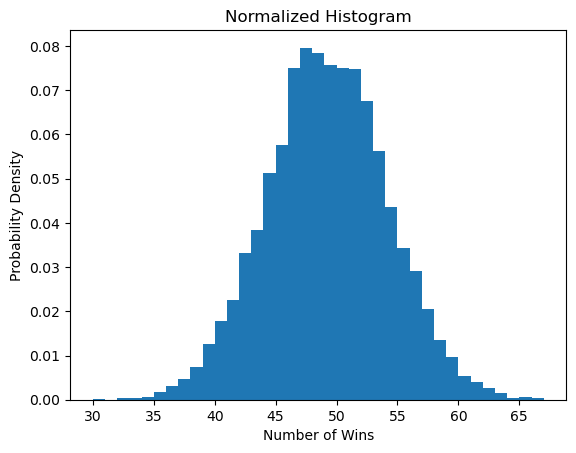

In [15]:
# Suppose that each game is played with 100 cards, 6 players, and 3 cards per player.
# Also suppose that the winning rate of a game is a function of the max gap between cards of different players.
# Assume each game results in winning if the max gap is equal to or smaller than 15

# Define a function that returns number of wins given n games played
def num_wins(n):
    win_count = 0
    
    for i in range(n):
        if max_gap_diff_pl(100, 6, 3) <= 15:
            win_count += 1
    
    return win_count

wins_list = []

# Draw a histogram based on the number of wins from 100 games played, based on 10,000 trials
for i in range(10000):
    wins_list.append(num_wins(100))
    
hist, bins = np.histogram(wins_list, bins=len(set(wins_list)), density=True)
bin_width = bins[1] - bins[0]
normalized_hist = hist / (bin_width * np.sum(hist))

plt.bar(bins[:-1], normalized_hist, width=bin_width, align='edge')
plt.xlabel('Number of Wins')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram')
plt.show()

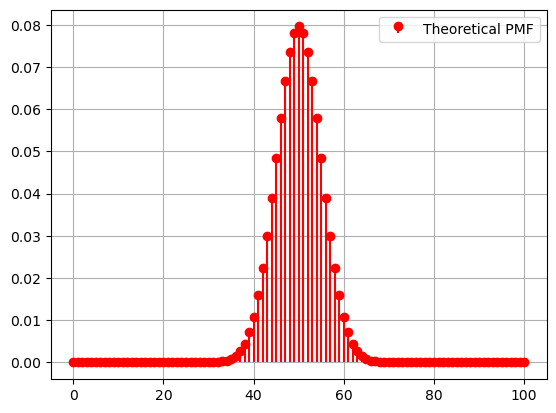

In [17]:
import scipy.stats as stats

# We plot a histogram on the binomial distribution assuming p = 0.5 (since 15 is the mean from previous section) with n = 100
bin_pmf = stats.binom.pmf(np.arange(101), 100, 0.5)

plt.stem(np.arange(101), bin_pmf, markerfmt='ro', basefmt=' ', linefmt='r-', label='Theoretical PMF')

plt.legend()
plt.grid(True)
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

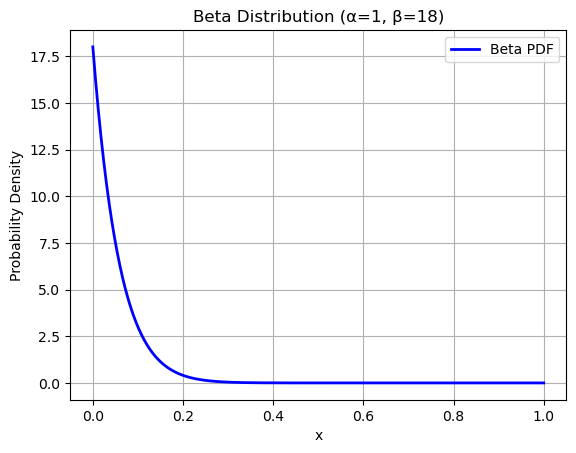

In [40]:
# Given we are pulling out 18 cards each time, n = 18 and since we are looking at the lowest number,
# we assign k = 1. So alpha = 1 and beta = 18

alpha = 1
beta = 18

x = np.linspace(0, 1, 1000)

pdf = stats.beta.pdf(x, alpha, beta)

plt.plot(x, pdf, 'b-', lw=2, label='Beta PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution (α={alpha}, β={beta})')

plt.legend()
plt.grid(True)

plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

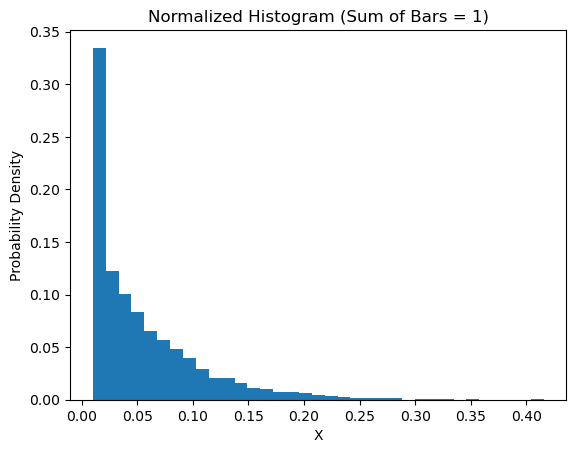

In [53]:
# Plot the hisogram based on the minimum number from Part 1 and the equation of X above.

x_list = []

# Obtain output of X based on 10,000 trials
for i in min_list:
    x_list.append(-np.log(1-i/100))

num_bins = 35
data_range = np.max(x_list) - np.min(x_list)
bin_width = data_range / num_bins
hist, bins = np.histogram(x_list, bins=num_bins, density=True)
normalized_hist = hist / np.sum(hist)

plt.bar(bins[:-1], normalized_hist, width=bin_width, align='edge')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram (Sum of Bars = 1)')
plt.show()

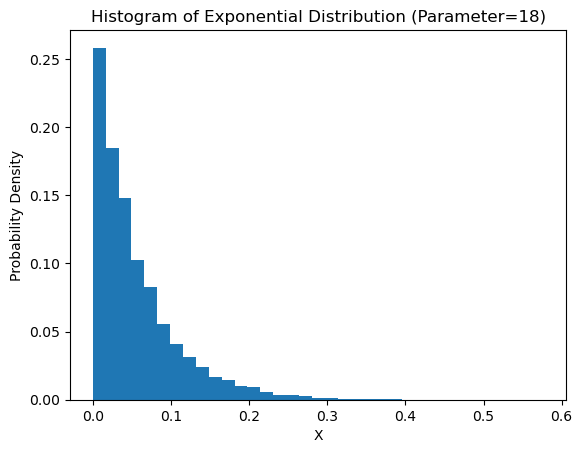

In [54]:
# Also plot a histogram based on an exponential distribution with parameter 18

sample_size = 10000
exponential_samples = np.random.exponential(scale=1/18, size=sample_size)

num_bins = 35
data_range = np.max(exponential_samples) - np.min(exponential_samples)
bin_width = data_range / num_bins

hist, bins = np.histogram(exponential_samples, bins=num_bins, density=True)

normalized_hist = hist / np.sum(hist)

plt.bar(bins[:-1], normalized_hist, width=bin_width, align='edge')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Histogram of Exponential Distribution (Parameter=18)')
plt.show()

'''
In the case of n * k << N with reposition:
1) The normalized distributions of the lowest number does not differ much if n and k are held the same because in both cases
   the distributions should follow beta(1, 18) distribution.
2) The gap between the means in the section 2 should be larger when n * k is notably smaller than N.

In the case of n * k << N without reposition:
1) The normalized distributions of the lowest number in this case has flatter slope as the space of smaller numbers gets taken.
2) The gap between the means will be larger regardless of sampling without reposition.

Given these points, n * k << N without reposition will have better chance of winning than n * k << N with reposition,
because flatter distribution in the lowest number effectively reduces the potential range of card numbers.

'''### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [ ]:
'''
In the case of n * k << N with reposition:
1) The normalized distributions of the lowest number does not differ much if n and k are held the same because in both cases
   the distributions should follow beta(1, 18) distribution.
2) The gap between the means in the section 2 should be larger when n * k is notably smaller than N.

In the case of n * k << N without reposition:
1) The normalized distributions of the lowest number in this case has flatter slope as the space of smaller numbers gets taken.
2) The gap between the means will be larger regardless of sampling without reposition.

Given these points, n * k << N without reposition will have better chance of winning than n * k << N with reposition,
because flatter distribution in the lowest number effectively reduces the potential range of card numbers.

'''

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Byungsoo Kim
- Member No2: 
- Member No3: